# Projeto ADEL (Análise Dados Estadia em Limeira) - Análise dos Dados dos Bairros
Neste notebook, realizarei alguns tratamentos no dataset de bairros e, posteriormente, a análise dos dados dos bairros de Limeira a fim de determinar os bairros elegíveis.

In [2]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Importando os dados

In [3]:
file = files.upload()

Saving bairros.csv to bairros.csv


In [6]:
df = pd.read_csv('bairros.csv')
df.head()

,bairro,latitude,longitude,distancia_unicamp
0,vila rocha,-22.577952,-47.410891,2.243706
1,jardim aquarius,-22.550608,-47.416676,1.467927
2,parque centreville,-22.551580,-47.422222,1.158567
3,parque sao bento,-22.552056,-47.418033,1.258614
4,vila anita,-22.556810,-47.410568,1.508559


In [8]:
columns_rename = {
    'latitude': 'lat',
    'longitude': 'lon',
    'distancia_unicamp': 'dist'
}

df.rename(columns=columns_rename, inplace=True)
df.head()

,bairro,lat,lon,dist
0,vila rocha,-22.577952,-47.410891,2.243706
1,jardim aquarius,-22.550608,-47.416676,1.467927
2,parque centreville,-22.551580,-47.422222,1.158567
3,parque sao bento,-22.552056,-47.418033,1.258614
4,vila anita,-22.556810,-47.410568,1.508559


## Análise exploratória

In [9]:
df.isnull().sum()

bairro    0
lat       0
lon       0
dist      0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   bairro  59 non-null     object 
 1   lat     59 non-null     float64
 2   lon     59 non-null     float64
 3   dist    59 non-null     float64
dtypes: float64(3), object(1)
memory usage: 2.0+ KB


In [11]:
df.describe()

,lat,lon,dist
count,59.000000,59.000000,59.000000
mean,-22.572316,-47.413645,2.780039
std,0.019447,0.024149,2.344121
min,-22.651307,-47.548925,0.075333
25%,-22.582414,-47.421991,1.376103
50%,-22.569700,-47.410891,2.476853
75%,-22.562740,-47.402588,3.523261
max,-22.511194,-47.352932,13.734928


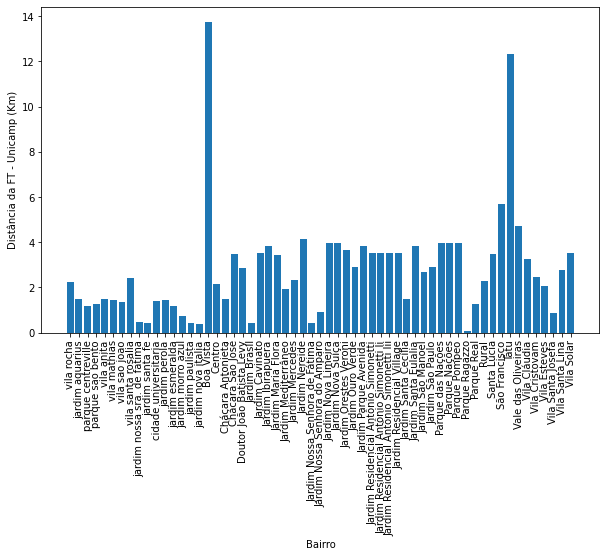

In [12]:
plt.figure(figsize=(10, 6))
plt.bar(df['bairro'], df['dist'])
plt.xlabel('Bairro')
plt.ylabel('Distância da FT - Unicamp (Km)')
plt.xticks(rotation=90)

plt.show()

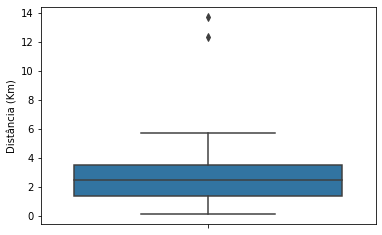

In [14]:
sns.boxplot(y='dist', data=df)
plt.ylabel('Distância (Km)')
plt.show()

In [16]:
df = df[df['dist'] < 8]
df.head()

,bairro,lat,lon,dist
0,vila rocha,-22.577952,-47.410891,2.243706
1,jardim aquarius,-22.550608,-47.416676,1.467927
2,parque centreville,-22.551580,-47.422222,1.158567
3,parque sao bento,-22.552056,-47.418033,1.258614
4,vila anita,-22.556810,-47.410568,1.508559


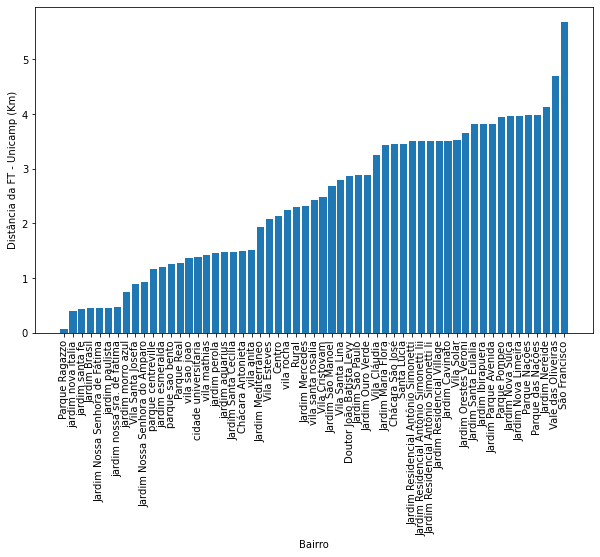

In [17]:
df_sorted = df.sort_values(by='dist')

plt.figure(figsize=(10, 6))
plt.bar(df_sorted['bairro'], df_sorted['dist'])
plt.xlabel('Bairro')
plt.ylabel('Distância da FT - Unicamp (Km)')
plt.xticks(rotation=90)

plt.show()